In [86]:
import importlib
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import backend as K
from tensorflow.python.ops import math_ops

# Add parent directory to path to 
# allow imports of custom modules
if not '..' in sys.path:
    sys.path.append('..')
    
from models.losses import triplets
from utils.generic import progress_bar
from utils.data.gen import \
    get_toy_dataset, \
    create_triplets_from_augmentations, \
    create_class_triplets, \
    create_triplets_from_hierarchical_classes
from utils.data.preproc import add_random_noise

In [90]:
PROJECT_HOME = '../../'
VIS_PATH = PROJECT_HOME+'vis/'

(8000, 2)

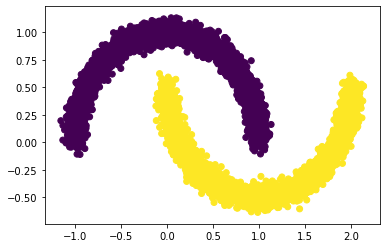

In [91]:
from sklearn.datasets import make_moons, make_blobs, make_circles, make_classification, make_gaussian_quantiles

# Create data set
X, y = get_toy_dataset('moons', n_samples=10000, std=0.05, n_classes=2, seed=132)
X, X_t, y, y_t = train_test_split(X, y, test_size=0.2, random_state=133)
plt.scatter(X[:,0], X[:,1], c=y)
X.shape

# Create Model

In [386]:
importlib.reload(triplets)

<module 'models.losses.triplets' from '../models/losses/triplets.py'>

In [387]:
n_in_nodes = X.shape[1]
n_out_nodes = 2
n_hidden = 80

inp = keras.Input(shape=n_in_nodes)
hidden = layers.Dense(n_hidden, 'relu')(inp)
out = layers.Dense(n_out_nodes, 'linear')(hidden)
model = keras.Model(inp, out)

print(model.input_shape, model.output_shape)
# Input shape : (None, 2)
# Output shape : (None, 2)

(None, 2) (None, 2)


In [388]:
loss = triplets.OnlineTripletLoss(margin=1., squared=True)
optimizer = tf.keras.optimizers.Adam()
loss_history = []

In [389]:
model.compile(optimizer, loss)

In [ ]:
history = model.fit(
    x=X, y=y, 
    epochs=150, 
    batch_size=128, 
    validation_split=0.2)

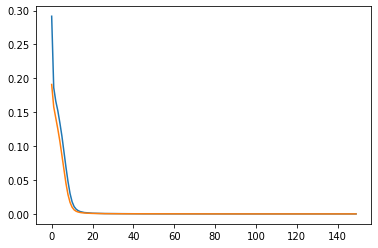

In [391]:
start = 0
end = None
plt.plot(history.history['loss'][start:end])
plt.plot(history.history['val_loss'][start:end])

## Visualize learned representations

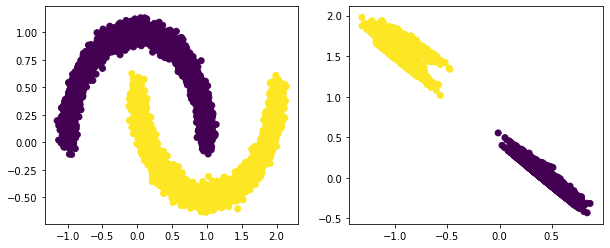

In [392]:
#def get_projection(dp):
#    return list(mo(np.array([dp])).numpy()[0])
    #return list(model([np.array([dp]),np.array([[0]*n_in_nodes]),np.array([[0]*n_in_nodes])]).numpy()[0,0])

Y_Hat = model([X]) # np.array([model(dp) for dp in X])

if n_out_nodes == 1:
    axarr = np.array([[0.]]*Y_Hat.shape[0])
    Y_Hat = np.concatenate((Y_Hat, axarr), axis = 1)
    print('Extended 1-D projections for plotting.')
    
fig, ax = plt.subplots(1,2,figsize=(10,4))
#ax[0].axis('off')
ax[0].scatter(X[:,0], X[:,1], c=y)
#ax[1].axis('off')
ax[1].scatter(Y_Hat[:,0], Y_Hat[:,1], c=y)
#plt.savefig(VIS_PATH+'hierarchical_class_triplets')
plt.show()